<a href="https://colab.research.google.com/github/COTILab/MCX24Workshop/blob/master/Training/MCX2024_1E_pmcx_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages installation

In [1]:
!pip install pmcx jdata
!git clone https://github.com/fanyuyen/MCXWorkshop2024pyPlot.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 9.6 MB/s eta 0:00:00
Cloning into 'MCXWorkshop2024pyPlot'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 27 (delta 6), reused 21 (delta 5), pack-reused 0
Receiving objects: 100% (27/27), 6.51 KiB | 6.51 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import numpy as np
import pmcx
import jdata as jd
from matplotlib import pyplot as plt
from MCXWorkshop2024pyPlot import plot_3d_slices
import copy

pmcx.__version__   # print imported pmcx version number

'0.3.3'

In [3]:
# show GPU information
pmcx.gpuinfo()

[{'name': 'Tesla T4',
  'id': 1,
  'devcount': 1,
  'major': 7,
  'minor': 5,
  'globalmem': 15835660288,
  'constmem': 65536,
  'sharedmem': 49152,
  'regcount': 65536,
  'clock': 1590000,
  'sm': 40,
  'core': 2560,
  'autoblock': 64,
  'autothread': 81920,
  'maxgate': 0}]

# Basic pmcx simulation example

In [ ]:
# @title Basic pmcx simulation example
# @markdown Photon numbers
nphoton = 10e4 # @param ["10e4", "10e5", "10e6", "10e7"] {type:"raw", allow-input: true}
# @markdown Simulation domain volumne
vol = [60,60,60] # @param
# @markdown starting time, time-gate width, and ending time of the simulation
tstart = 0 # @param {type:"number"}
tend = 5e-9 # @param {type:"number"}
tstep = 5e-9 # @param {type:"number"}
# @markdown Source position
srcpos = [30,30,0] # @param
# @markdown Source direction
srcdir = [0,0,1] # @param
# @markdown Optical properties [$\mu_a$, $\mu_s$, g, n]
prop = [[0,0,1,1],[0.005,0.1,0.01,1.37]] # @param

cfg = {
       'nphoton': nphoton,
       'vol':np.ones(vol,dtype='uint8'),
       'tstart':tstart,
       'tend':tend,
       'tstep':tend,
       'srcpos': srcpos,
       'srcdir': srcdir,
       'prop':prop
       }

In [ ]:
# cfg = {
#        'nphoton': 1000000,
#        'vol':np.ones([60,60,60],dtype='uint8'),
#        'tstart':0,
#        'tend':5e-9,
#        'tstep':5e-9,
#        'srcpos': [30,30,0],
#        'srcdir':[0,0,1],
#        'prop':[[0,0,1,1],[0.005,0.1,0.01,1.37]]
#        }

In [ ]:
# Run simulation
res = pmcx.mcxlab(cfg)

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09


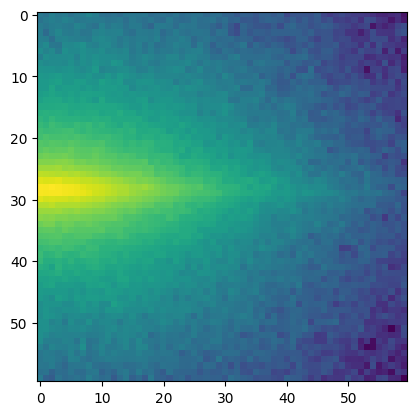

In [ ]:
# Plot result
plt.imshow(np.log10(res['flux'][30,:, :]))
plt.show()

In [ ]:
# Plot result in 3d
plot_3d_slices(np.log10(res['flux']))

<ipython-input-8-ceb940245593>:1: RuntimeWarning: divide by zero encountered in log10
  plot_3d_slices(np.log10(res['flux']))


In [ ]:
# @title pmcx simulation with detector
# @markdown Photon numbers
nphoton = 10e4 # @param ["10e4", "10e5", "10e6", "10e7"] {type:"raw", allow-input: true}
# @markdown Simulation domain volumne
vol = [60,60,60] # @param
# @markdown starting time, time-gate width, and ending time of the simulation
tstart = 0 # @param {type:"number"}
tend = 5e-9 # @param {type:"number"}
tstep = 5e-9 # @param {type:"number"}
# @markdown Source position
srcpos = [30,30,0] # @param
# @markdown Source direction
srcdir = [0,0,1] # @param
# @markdown Optical properties [$\mu_a$, $\mu_s$, g, n]
prop = [[0,0,1,1], [0.005, 1, 0, 1.37], [0.2, 10, 0.9, 1.37]] # @param
# @markdown detectors
detpos = [[30, 20, 1, 1], [30, 40, 1, 1], [20, 30, 1, 1], [40, 30, 1, 1]] # @param

cfg = {
       'nphoton': nphoton,
       'vol':np.ones(vol,dtype='uint8'),
       'tstart':tstart,
       'tend':tend,
       'tstep':tend,
       'srcpos': srcpos,
       'srcdir': srcdir,
       'prop':prop,
       'detpos': detpos
       }

In [ ]:
# Run simulation
res = pmcx.mcxlab(cfg)

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09


<ipython-input-11-c02e52a13411>:1: RuntimeWarning:

divide by zero encountered in log10



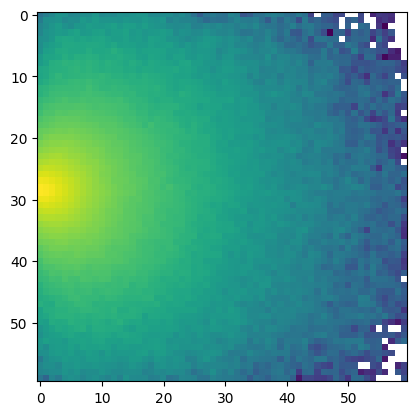

In [ ]:
# Plot result
plt.imshow(np.log10(res['flux'][30,:, :]))
plt.show()

In [ ]:
# Plot result in 3D
plot_3d_slices(np.log10(res['flux']))

<ipython-input-12-ceb940245593>:1: RuntimeWarning:

divide by zero encountered in log10



In [12]:
# @title pmcx simulation with detector and inclusions
# @markdown Photon numbers
nphoton = 10e4 # @param ["10e4", "10e5", "10e6", "10e7"] {type:"raw", allow-input: true}
# @markdown Simulation domain volumne
vol = [60,60,60] # @param
# @markdown starting time, time-gate width, and ending time of the simulation
tstart = 0 # @param {type:"number"}
tend = 5e-9 # @param {type:"number"}
tstep = 5e-9 # @param {type:"number"}
# @markdown Source position
srcpos = [30,30,0] # @param
# @markdown Source direction
srcdir = [0,0,1] # @param
# @markdown Optical properties [$\mu_a$, $\mu_s$, g, n]
prop = [[0,0,1,1], [0.005, 1, 0, 1.37], [0.2, 10, 0.9, 1.37]] # @param
# @markdown Detectors
detpos = [[30, 20, 1, 1], [30, 40, 1, 1], [20, 30, 1, 1], [40, 30, 1, 1]] # @param

# @markdown Add inclusion (box)
inclusion1 = "20:40,20:40,10:30" # @param
# @markdown Add inclusion (layer)
inclusion2 = ":, :, 1" # @param

def parse_slices(slice_str):
    # Split the string by commas to separate dimensions
    ranges = slice_str.split(',')
    # Convert each range string into a slice object or an integer for specific indices
    slices = []
    for r in ranges:
        r = r.strip()  # Remove any leading or trailing spaces
        if ':' in r:
            parts = r.split(':')
            start = int(parts[0]) if parts[0] else None
            end = int(parts[1]) if len(parts) > 1 and parts[1] else None
            slices.append(slice(start, end))
        else:
            slices.append(int(r))
    return tuple(slices)

cfg = {
       'nphoton': nphoton,
       'vol':np.ones(vol,dtype='uint8'),
       'tstart':tstart,
       'tend':tend,
       'tstep':tend,
       'srcpos': srcpos,
       'srcdir': srcdir,
       'prop':prop,
       'detpos': detpos
       }
cfg['vol'][parse_slices(inclusion1)] = 2
cfg['vol'][parse_slices(inclusion2)] = 0

In [13]:
# cfg = {
#     "nphoton": 1e7,
#     "vol": np.ones((60, 60, 60), dtype=np.uint8),
#     "prop": [
#         [0, 0, 1, 1],
#         [0.005, 1, 0, 1.37],
#         [0.2, 10, 0.9, 1.37]
#     ],
#     "issrcfrom0": 1,
#     "srcpos": [30, 30, 1],
#     "srcdir": [0, 0, 1],
#     "detpos": [
#         [30, 20, 1, 1],
#         [30, 40, 1, 1],
#         [20, 30, 1, 1],
#         [40, 30, 1, 1]
#     ],
#     "issaveref": 1,
#     "gpuid": 1,
#     "autopilot": 1,
#     "tstart": 0,
#     "tend": 5e-9,
#     "tstep": 5e-10
# }

# # Add an inclusion
# cfg["vol"][20:40, 20:40, 10:30] = 2
# # Pad a layer of 0s to get diffuse reflectance
# cfg["vol"][:, :, 1] = 0


In [14]:
# Show the simulation domain
plot_3d_slices(cfg['vol'])

In [15]:
# Run simulation
res = pmcx.mcxlab(cfg)

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09


In [16]:
# Plot result in 3D
plot_3d_slices(np.log10(res['flux']), z_index = 0)

<ipython-input-16-79bbb95b069d>:2: RuntimeWarning:

divide by zero encountered in log10



# Different source types

## pencil + isotropic

In [ ]:
# pencil
cfg = {
    "nphoton": 1e7,
    "vol": np.ones((60, 60, 60), dtype=np.uint8),
    "srcpos": [30, 30, 30],
    "srcdir": [0, 0, 1],
    "gpuid": 1,
    "autopilot": 1,
    "prop": [
        [0, 0, 1, 1],
        [0.005, 1, 0.8, 1.37]],
    "tstart": 0,
    "tend": 5e-9,
    "tstep": 5e-10,
    "seed": 99999,
    "srctype": "pencil"
}
res_pencil = pmcx.mcxlab(cfg);

nphoton: 1e+07
tstart: 0
tstep: 5e-10
tend: 5e-09
autopilot: 1


In [ ]:
# isotropic
cfg["srctype"] = "isotropic"
res_isotropic = pmcx.mcxlab(cfg);

nphoton: 1e+07
tstart: 0
tstep: 5e-10
tend: 5e-09
autopilot: 1


In [ ]:
fcw_pencil = np.mean(res_pencil['flux'], axis=3) * cfg['tstep']
fcw_isotropic = np.mean(res_isotropic['flux'], axis=3) * cfg['tstep']

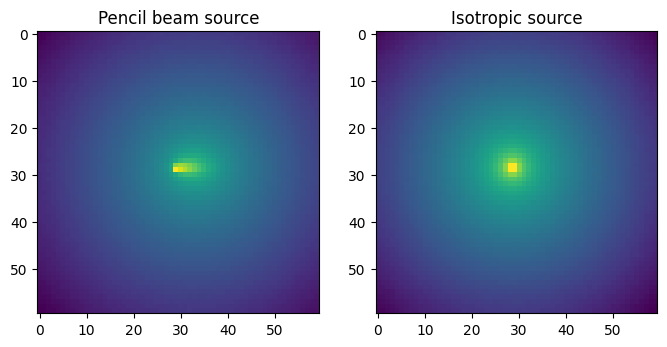

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

axs[0].imshow(np.log10(fcw_pencil[:, 29, :]))
axs[0].set_title('Pencil beam source')

axs[1].imshow(np.log10(fcw_isotropic[:,29,:]))
axs[1].set_title('Isotropic source')

plt.show()

## panel

In [ ]:
cfg = {
    "nphoton": 1e7,
    "vol": np.ones((60, 60, 60), dtype=np.uint8),
    "srcdir": [0, 0, 1, 0],
    "gpuid": 1,
    "autopilot": 1,
    "prop": [
        [0, 0, 1, 1],
        [0.005, 1, 0.8, 1.37]
    ],
    "tstart": 0,
    "seed": 99999,
    "srctype": "planar",
    "srcpos": [10, 10, 0],
    "srcparam1": [40, 0, 0, 0],
    "srcparam2": [0, 40, 0, 0],
    "tend": 0.4e-10,
    "tstep": 0.4e-10
}
res_panel = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 4e-11
tend: 4e-11
autopilot: 1


In [ ]:
fcw_panel = np.mean(res_panel['flux'], axis=3) * cfg['tstep']

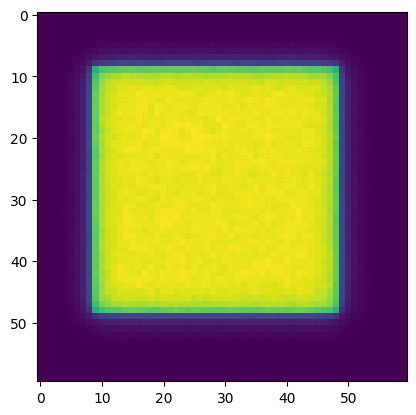

In [ ]:
plt.imshow(fcw_panel[:,:,1])
plt.show()

## pattern

In [ ]:
# pattern
mcximg = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

cfg = {
    "nphoton": 1e7,
    "vol": np.ones((60, 60, 60), dtype=np.uint8),
    "gpuid": 1,
    "autopilot": 1,
    "prop": [
        [0, 0, 1, 1],
        [0.005, 1, 0.8, 1.37]
    ],
    "srctype": "pattern",
    "srcpattern": mcximg,
    "srcpos": [-10 * np.sqrt(2), 0, 40],
    "srcdir": [1, 1, 0] / np.sqrt(2),
    "srcparam1": [20 / np.sqrt(2), -20 / np.sqrt(2), 0, mcximg.shape[0]],
    "srcparam2": [0, 0, -15, mcximg.shape[1]],
    "tend": 2e-10,
    "tstep": 2e-10,
    "voidtime": 0
}
res_pattern = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 2e-10
tend: 2e-10
autopilot: 1
voidtime: 0


In [ ]:
fcw_pattern = np.mean(res_pattern['flux'], axis=3) * cfg['tstep']

In [ ]:
log_flux_data = copy.deepcopy(np.log10(np.abs((fcw_pattern))+1))
plot_3d_slices(log_flux_data, x_index=0, y_index=0, z_index=30)

# Pmcx data exchange with mcxlab

##  mcxlab to pmcx

### Setting up octave environment for running mcxlab

In [ ]:
!apt-get install octave      # install octave to Linux host
!pip install oct2py          # install oct2py Python module

# add octave support to colab notebook
%load_ext oct2py.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [ ]:
# download and unzip mcxlab
!rm -rf mcxlab*
!wget http://mcx.space/nightly/release/v2023/mcxlab-allinone-v2023.zip  # download mcxlab
!unzip mcxlab-allinone-v2023.zip && rm -rf mcxlab-allinone-v2023.zip # unzip mcxlab

# download jsonlab and zmat toolboxes for sharing data between MATLAB and Python
!git clone https://github.com/fangq/jsonlab.git  # download jsonlab
!git clone https://github.com/NeuroJSON/zmat.git # download zmat

--2024-06-17 20:25:38--  http://mcx.space/nightly/release/v2023/mcxlab-allinone-v2023.zip
Resolving mcx.space (mcx.space)... 74.208.236.196, 2607:f1c0:100f:f000::2ed
Connecting to mcx.space (mcx.space)|74.208.236.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26277218 (25M) [application/zip]
Saving to: ‘mcxlab-allinone-v2023.zip’

mcxlab-allinone-v20 100%[===================>]  25.06M  28.7MB/s    in 0.9s    

2024-06-17 20:25:40 (28.7 MB/s) - ‘mcxlab-allinone-v2023.zip’ saved [26277218/26277218]

Archive:  mcxlab-allinone-v2023.zip
   creating: mcxlab/
  inflating: mcxlab/mcxlab.m         
  inflating: mcxlab/DESCRIPTION      
   creating: mcxlab/tutorials/
  inflating: mcxlab/tutorials/mcxlab_getting_started.ipynb  
   creating: mcxlab/filter/
   creating: mcxlab/filter/Wave3D/
  inflating: mcxlab/filter/Wave3D/sfb3D.m  
  inflating: mcxlab/filter/Wave3D/FSfarras.m  
  inflating: mcxlab/filter/Wave3D/dwt3D_plots.m  
  inflating: mcxlab/filter/Wave3D/farr

In [ ]:
%%octave
addpath([pwd filesep 'mcxlab']);                 % add path to mcx
addpath([pwd filesep 'mcxlab' filesep 'utils']); % add path to mcx helper functions
addpath([pwd filesep 'jsonlab']);                % optional: add path to jsonlab for data export
addpath([pwd filesep 'zmat']);                   % optional: add path to zmat for data compression

### Run mcxlab

In [ ]:
%%octave
clear cfg

% the below fields are minimumally required to define an MCX simulation
cfg.nphoton=1e7;                   % define how many photon packets to simulate
cfg.vol=uint8(ones(60,60,60));     % define a label-based volume - each voxel has a integer defining the medium type
cfg.vol(20:40, 30:40, 20:30)=2;    % adding an inclusion by setting to a different label
cfg.srcpos=[30 30 1];              % source position in voxel-units
cfg.srcdir=[0 0 1];                % source direction (default source type is a pencil beam)
cfg.prop=[0 0 1 1;                 % cfg.prop defines the optical properties, one medium per row; first row is for medium label 0 (background)
          0.005 1 0 1.37;          % cfg.prop has 4 columns, in the order [mua(1/mm), mus(1/mm), g(anisotropy), n(ref index)]; 2nd row for medium type 1
          0.1, 10, 0.9, 1];        % third row is for medium type 2, and so on
cfg.tstart=0;                      % define the start time of the simulation (in s)
cfg.tend=5e-9;                     % define the maximum duration of the photon packet (in s)
cfg.tstep=5e-9;                    % define the time gate (step size) of the output, if tstep=tend as a large time window,this produces a CW solution
cfg.gpuid=1;                       % use the first GPU (default), can use strings of '01' masks to use multiple GPU, such as '0110'

% reduce photon number on runtimes without a GPU (CPU only)
if(exist('USE_MCXCL', 'var') && USE_MCXCL==1)  % if no GPU is found, run less photon on the CPU
    cfg.nphoton=1e5;               % define how many photon packets to simulate
end

In [ ]:
%%octave
% calculate the flux distribution with the given config
flux=mcxlab(cfg);

Launching MCXLAB - Monte Carlo eXtreme for MATLAB & GNU Octave ...

Running simulations for configuration #1 ...

mcx.nphoton=1e+07;

mcx.dim=[60 60 60];

mcx.mediabyte=1;

mcx.srcpos=[30 30 1 1];

mcx.srcdir=[0 0 1 0];

mcx.medianum=3;

mcx.tstart=0;

mcx.tend=5e-09;

mcx.tstep=5e-09;

mcx.gpuid=1;

###############################################################################

#                      Monte Carlo eXtreme (MCX) -- CUDA                      #

#          Copyright (c) 2009-2023 Qianqian Fang <q.fang at neu.edu>          #

#                https://mcx.space/  &  https://neurojson.org/                #

#                                                                             #

# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #

#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #

###############################################################################

#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #

###############################################################################

#  Open-source codes and reusable scientific data are essential for research, #

# MCX proudly developed human-readable JSON-based data formats for easy reuse,#

#  Please consider using JSON (https://neurojson.org/) for your research data #

###############################################################################

$Rev::408d69$ v2023  $Date::2023-09-29 12:22:54 -04$ by $Author::Qianqian Fang$

###############################################################################

- code name: [Heroic Hadron] compiled by nvcc [7.5] for CUDA-arch [350] on [Sep 29 2023]

- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (Tesla T4) threadph=122 extra=5760 np=10000000 nthread=81920 maxgate=1 repetition=1

initializing streams ...	init complete : 0 ms

requesting 1024 bytes of shared memory

launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...

simulation run# 1 ...

kernel complete:  	690 ms

retrieving fields ... 	transfer complete:	693 ms

normalizing raw data ...	source 1, normalization factor alpha=20.000000

data normalization complete : 701 ms

simulated 10000000 photons (10000000) with 81920 threads (repeat x1)

MCX simulation speed: 15037.59 photon/ms

total simulated energy: 10000000.00	absorbed: 27.29262%

(loss due to initial specular reflection is excluded in the total)

### save mcxlab output

In [ ]:
%%octave
% save to text-based JSON file and list file size
tic;savejd('', flux, 'filename', 'mcx_flux.json', 'compression', 'zlib');toc
system('ls -l mcx_flux.json');

Elapsed time is 0.0997889 seconds.

-rw-r--r-- 1 root root 1071654 Jun 17 20:28 mcx_flux.json

### load mcxlab output to python

In [ ]:
import jdata as jd
flux=jd.load('mcx_flux.json')

In [ ]:
plot_3d_slices(np.log10(flux['data']))